In [32]:
import numpy as np 
import pandas as pd 

#import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [18]:
# Load test and train data sets
test_df = pd.read_csv("static/test.csv")
train_df = pd.read_csv("static/train.csv")

In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Column definitions
# survival:    Survival 
# PassengerId: Unique Id of a passenger. 
# pclass:    Ticket class     
# sex:    Sex     
# Age:    Age in years     
# sibsp:    # of siblings / spouses aboard the Titanic     
# parch:    # of parents / children aboard the Titanic     
# ticket:    Ticket number     
# fare:    Passenger fare     
# cabin:    Cabin number     
# embarked:    Port of Embarkation

In [14]:
# Removing following columns, as unnecessary for our analysis:
# sipsp
# parch
# ticket
# fare
# cabin
test_data_clean = test_df.drop(['SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1)
test_data_clean.head()

,PassengerId,Pclass,Name,Sex,Age,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,S


In [15]:
train_data_clean = train_df.drop(['SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1)
train_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,S


In [19]:
train_data_clean.to_csv(r'static/training_data_clean.csv')

In [21]:
test_data_clean.to_csv(r'static/test_data_clean.csv')

In [25]:
train_df = train_data_clean
print(train_df.shape)

(891, 7)


In [27]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,S
...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,C


In [29]:
#Let's do a survivability train on passenger class
X = train_df[["Pclass"]]
y = train_df[["Survived"]]
print(X.shape, y.shape)

(891, 1) (891, 1)


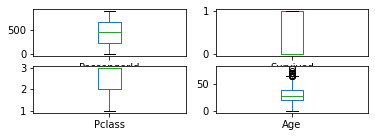

In [31]:
train_df.plot(kind='box',subplots=True, layout=(4,2), sharex=False, sharey=False)
plt.show()